<h2>Question 1</h2>

<b>K-means</b> clustering is an iterative algorithm that partitions a dataset into k clusters based on minimizing the sum of squared distances between the data points and their assigned cluster centroid. It requires specifying the number of clusters k a priori and can converge to suboptimal solutions depending on the initial centroid positions.

<b>Expectation Maximization (EM) algorithm</b>, in the context of clustering, is used to estimate the parameters of a Gaussian Mixture Model (GMM). It is a probabilistic clustering algorithm that assigns a probability distribution to each data point over the set of clusters. It then iteratively updates the parameters of the GMM to maximize the likelihood of the observed data given the current parameter estimates. EM is more computationally expensive than k-means but can handle more complex data distributions and does not require specifying the number of clusters k beforehand.

In this project, we will choose appropriate measures of distance or similarity based on the problem requirements and to justify these choices as part of the analysis. The choice of distance or similarity metric can greatly affect the performance of the clustering algorithms and the resulting cluster assignments.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Data
data = 'WineQT.xls'
df = pd.read_csv(data)
#df.shape
#df.info()
df.head()
#df.isnull().sum()
#df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
from sklearn.preprocessing import MinMaxScaler

X = df
cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.000000
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,0.000626
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,0.001252
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,0.001879
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.002505


K-Means model with two clusters 

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

K-Means model parameters study

In [5]:
kmeans.cluster_centers_

array([[0.2686595 , 0.27787876, 0.22820738, 0.10357633, 0.11579052,
        0.2334811 , 0.12751588, 0.41461822, 0.47983062, 0.18638645,
        0.37126763, 0.55500879, 0.75289124],
       [0.38765379, 0.28556513, 0.30817073, 0.11993461, 0.13432085,
        0.20293567, 0.15444897, 0.56276766, 0.41966858, 0.2059922 ,
        0.2575717 , 0.50801394, 0.25737827]])

- The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

- The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.

- The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

The code below calculates the sum of squared distances of samples to their closest cluster center, which is known as the inertia value of the K-means clustering model

- The lower values of inertia are better and zero is optimal.

- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

- Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

We can calculate model inertia as follows:-

In [6]:
kmeans.inertia_

269.15873631062146

- The lesser the model inertia, the better the model fit.

- We can see that the model has very high inertia. So, this is not a good model fit to the data.

<b>Use elbow method to find optimal number of clusters</b>

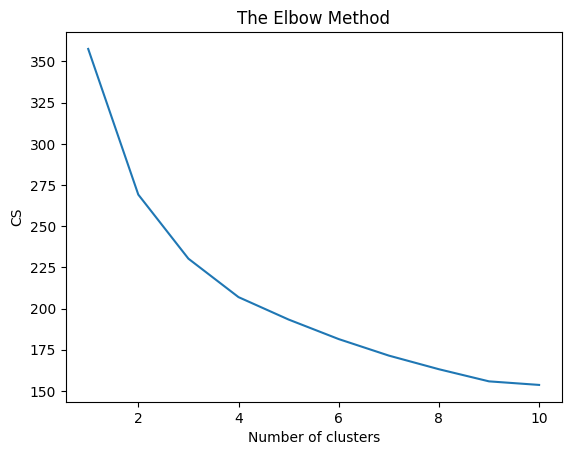

In [7]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

By the above plot, we can see that there is a kink at k=2.

Hence k=2 can be considered a good number of the cluster to cluster this data.

But, we have seen that I have achieved a weak classification accuracy of 1% with k=2.

I will write the required code with k=2 again for convinience.

<h3>Gaussian Mixture</h3>

- As the name implies, a Gaussian mixture model involves the mixture (i.e. superposition) of multiple Gaussian distributions. Here rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. 

- And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
gm_df = pd.read_csv('WineQT.xls')
gm_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(gm_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.408731,-0.594955
1,-0.252694,-0.697567


In [11]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(X_principal)

GaussianMixture(n_components=3)

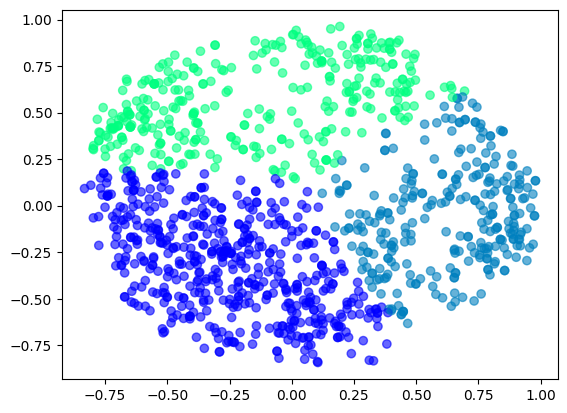

In [12]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 

<h4>Number of components(k) selection</h4>

<h3>Silhouette score</h3>

- Silhouette score checks how much the clusters are compact and well separated. The more the score is near to one, the better the clustering is.

- Since we already know that the fitting procedure is not deterministic, we run twenty fits for each number of clusters, then we consider the mean value and the standard deviation of the best five runs.

Text(0, 0.5, 'Score')

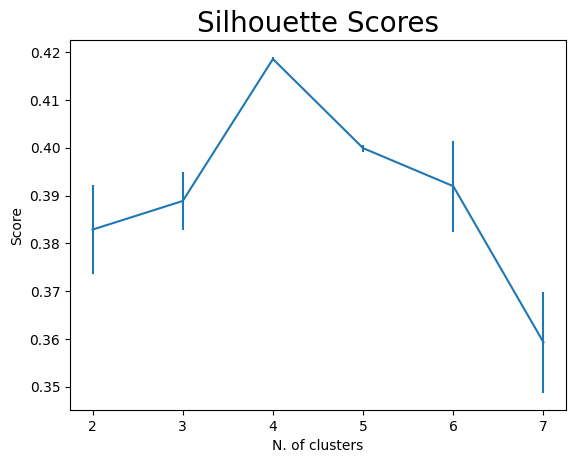

In [13]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        labels=gmm.predict(X_principal)
        sil=metrics.silhouette_score(X_principal, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)
    
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

<h4>Distance between GMMs</h4>

- Here we form two datasets, each with an half randomly choose amount of data. We will then check how much the GMMs trained on the two sets are similar, for each configuration.

- Since we are talking about distributions, the concept of similarity is embedded in the Jensen-Shannon (JS) metric. 

- The lesser is the JS-distance between the two GMMs, the more the GMMs agree on how to fit the data.

- The lower the distance, the better the cluster.

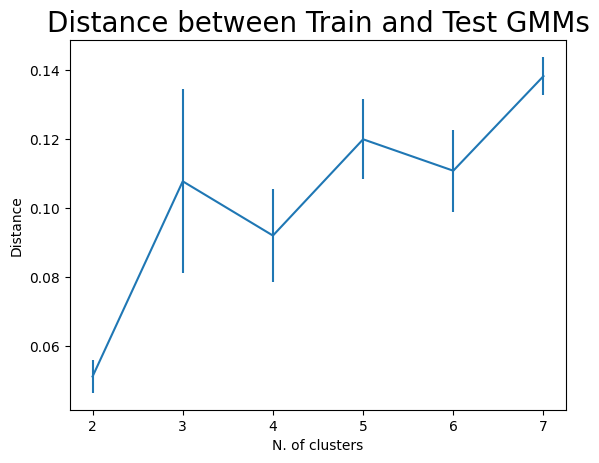

In [14]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

n_clusters=np.arange(2, 8)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(X_principal, test_size=0.5)
        
        gmm_train=GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)
    
    
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

<h4>Bayesian information criterion (BIC)</h4>

- This criterion gives us an estimation on how much is good the GMM in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data we have. In order to avoid overfitting, this technique penalizes models with big number of clusters.

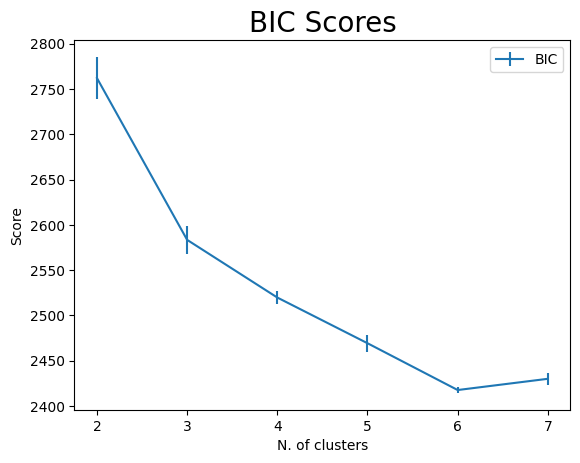

In [15]:
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        
        tmp_bic.append(gmm.bic(X_principal))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)
    
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

- Following this criterion, the bigger the number of clusters, the better should be the model. Which means that the penalty BIC criteria gives to complex models do not save us from overfit.

- But before screaming and trashing out this technique, we can notice two things. The first is that the curve is fairly smooth and monotone. 

- The second is that the curve follows different slopes in different part of it. Starting from these two observations, the temptation to check where the BIC curve change slope is big. So let’s check it!

- Technically, we have to calculate the gradient of the BIC scores curve. Intuitively, the concept of gradient is simple: if two consecutive points have the same value, their gradient is zero. 

- If they have different values, their gradient can be eighter negative, if the second point has a lower value, or positive otherwise. 

- The magnitude of the gradient tells us how much the two values are different.

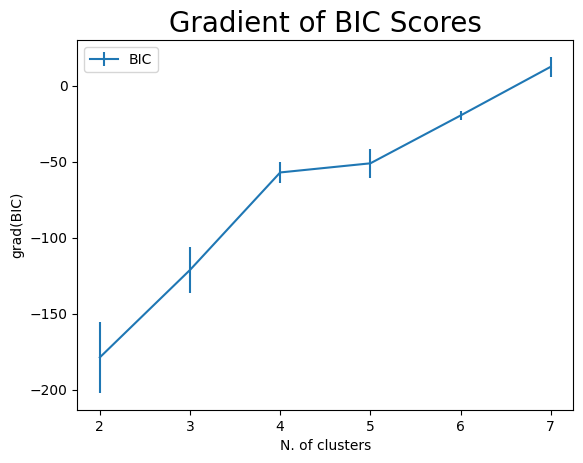

In [16]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

<h1>Question 2</h1>

<b>Principal Component Analysis (PCA)</b> is a popular technique in machine learning for reducing the dimensionality of a dataset. The goal of dimensionality reduction is to transform high-dimensional data into a lower-dimensional representation, while preserving as much of the original information as possible. 

- In a PCA project, the main objective is to identify the most important features or variables that contribute the most to the variation in the dataset, and use them to create a new set of features that can accurately represent the original data in a lower-dimensional space. 

- This can be useful for a variety of applications, such as data compression, visualization, and feature extraction for other machine learning models. In this project, we will explore the use of PCA on a real-world dataset, and demonstrate how it can be used to improve the performance of a machine learning model.

In [17]:
#let us start by importing the relevant libraries

%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [18]:
data = 'WineQT.xls'
pca_df = pd.read_csv(data)
pca_df.head()
#pca_df.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [19]:
X = pca_df.iloc[:,0:12].values
y = pca_df.iloc[:,12].values

X

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.2  ,  0.6  ,  0.08 , ...,  0.58 , 10.5  ,  5.   ],
       [ 5.9  ,  0.55 ,  0.1  , ...,  0.76 , 11.2  ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ]])

Scaling The Independent Data Set

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)    

Calculating covariance matrix

Covariance matrix should be 12*12 matrix

In [21]:
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (12, 12)
Covariance_matrix [[ 1.00087566 -0.25094787  0.67374671  0.171981    0.10798304 -0.16497513
  -0.11072524  0.68209764 -0.68576257  0.17474471 -0.07512058  0.1220769 ]
 [-0.25094787  1.00087566 -0.54466346 -0.00575613  0.05638559 -0.0019642
   0.0778158   0.01652598  0.22168547 -0.27632035 -0.20408783 -0.40775025]
 [ 0.67374671 -0.54466346  1.00087566  0.17596881  0.2455273  -0.05763953
   0.0369034   0.37557184 -0.54681754  0.3315218   0.10634338  0.24103171]
 [ 0.171981   -0.00575613  0.17596881  1.00087566  0.07092516  0.16548358
   0.1909571   0.38047983 -0.11706135  0.01748981  0.05847176  0.0220212 ]
 [ 0.10798304  0.05638559  0.2455273   0.07092516  1.00087566  0.01529384
   0.04820534  0.20908364 -0.27800229  0.37511208 -0.23011842 -0.12419319]
 [-0.16497513 -0.0019642  -0.05763953  0.16548358  0.01529384  1.00087566
   0.66167176 -0.05419774  0.07286746  0.03447528 -0.04713607 -0.06331504]
 [-0.11072524  0.0778158   0.0369034   0.1909571   0.04820534 

Calculating Eigen Vectors & Eigen Values: Using numpy linear algebra function

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-4.83653366e-01  6.41722768e-03  1.58861437e-01  2.36825691e-01
   9.91428745e-02 -6.27716211e-01 -2.93714338e-01 -9.32264073e-02
  -2.85812057e-01  1.62717104e-01  2.17473552e-01  1.74466376e-01]
 [ 2.53194723e-01  3.59826164e-01  2.02998678e-01 -2.25249782e-02
  -3.21869961e-01 -1.33312205e-02  3.66848076e-01 -3.80857943e-01
  -5.81340453e-01 -1.31133619e-01  1.43490586e-01  7.45060568e-02]
 [-4.69788400e-01 -1.44494790e-01 -1.07766516e-01  3.02621083e-02
   1.25425992e-01  5.27831189e-02  6.41820345e-01 -1.14410190e-01
   2.50518681e-01 -3.13191105e-01  3.03700413e-01  2.21963276e-01]
 [-1.68789469e-01  1.43006434e-01 -2.30438351e-01  4.20086966e-01
  -6.82356033e-01 -1.82982302e-01  9.51525461e-02 -4.37803562e-02
   2.91819338e-01  5.03914007e-02 -1.95890526e-01 -2.92148009e-01]
 [-2.11254871e-01  1.85824352e-01 -1.40582830e-02 -6.36835614e-01
  -2.93642503e-01 -4.74882940e-02 -2.41268781e-01 -3.25672667e-01
   2.74162373e-01 -1.03559131e-02 -1.85549783e-01  3.9

Sort eigenvalues in descending order

In [23]:
# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(3.1804409884409237, array([-0.48365337,  0.25319472, -0.4697884 , -0.16878947, -0.21125487,
        0.05627137,  0.0021388 , -0.37663757,  0.4269183 , -0.24968643,
        0.08097006, -0.109392  ])), (2.2365592896477824, array([ 0.00641723,  0.35982616, -0.14449479,  0.14300643,  0.18582435,
        0.227525  ,  0.3334746 ,  0.32258175, -0.07580841, -0.13956164,
       -0.5076335 , -0.49464696])), (1.6878640754824603, array([ 0.15886144,  0.20299868, -0.10776652, -0.23043835, -0.01405828,
       -0.63128618, -0.5681389 ,  0.16047703, -0.05938982, -0.20790785,
       -0.20327682, -0.18305811])), (1.2167343248733924, array([ 0.23682569, -0.02252498,  0.03026211,  0.42008697, -0.63683561,
        0.0402675 ,  0.04299987,  0.20039953,  0.00768023, -0.54423949,
        0.13268425,  0.05446664])), (0.968237425988328, array([ 0.09914287, -0.32186996,  0.12542599, -0.68235603, -0.2936425 ,
        0.14856544,  0.2032695 , -0.18837837, -0.27921954, -0.24208693,
       -0.2679256 , -0.10850214

In [24]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

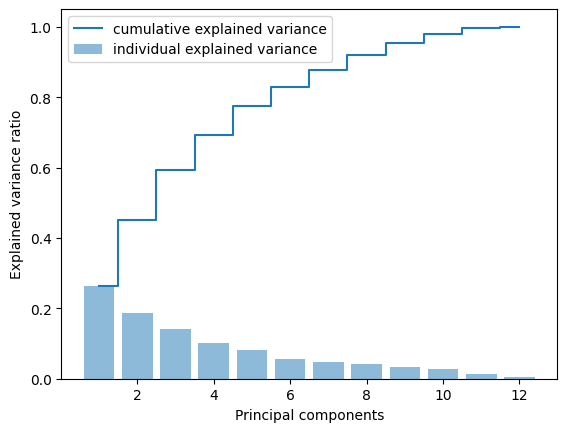

In [25]:
plt.bar(range(1,13), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,13),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

Observation


- From above we plot we can clealry observer that 7 dimension() are able to explain 90 %variance of data. 
- so we will use first 7 principal components going forward and calulate the reduced dimensions. 

Dimensionality Reduction

Now 7 dimensions seems very reasonable. With 7 variables we can explain over 90% of the variation in the original data.

In [26]:
# P_reduce represents reduced mathematical space

P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 7 to 3.5 dimension space

X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

reduced_pca

#Save dataset for question four & five
dimensionaly_reduced_data = reduced_pca

Let us check The Pairplot Of Reduced Dimension After PCA

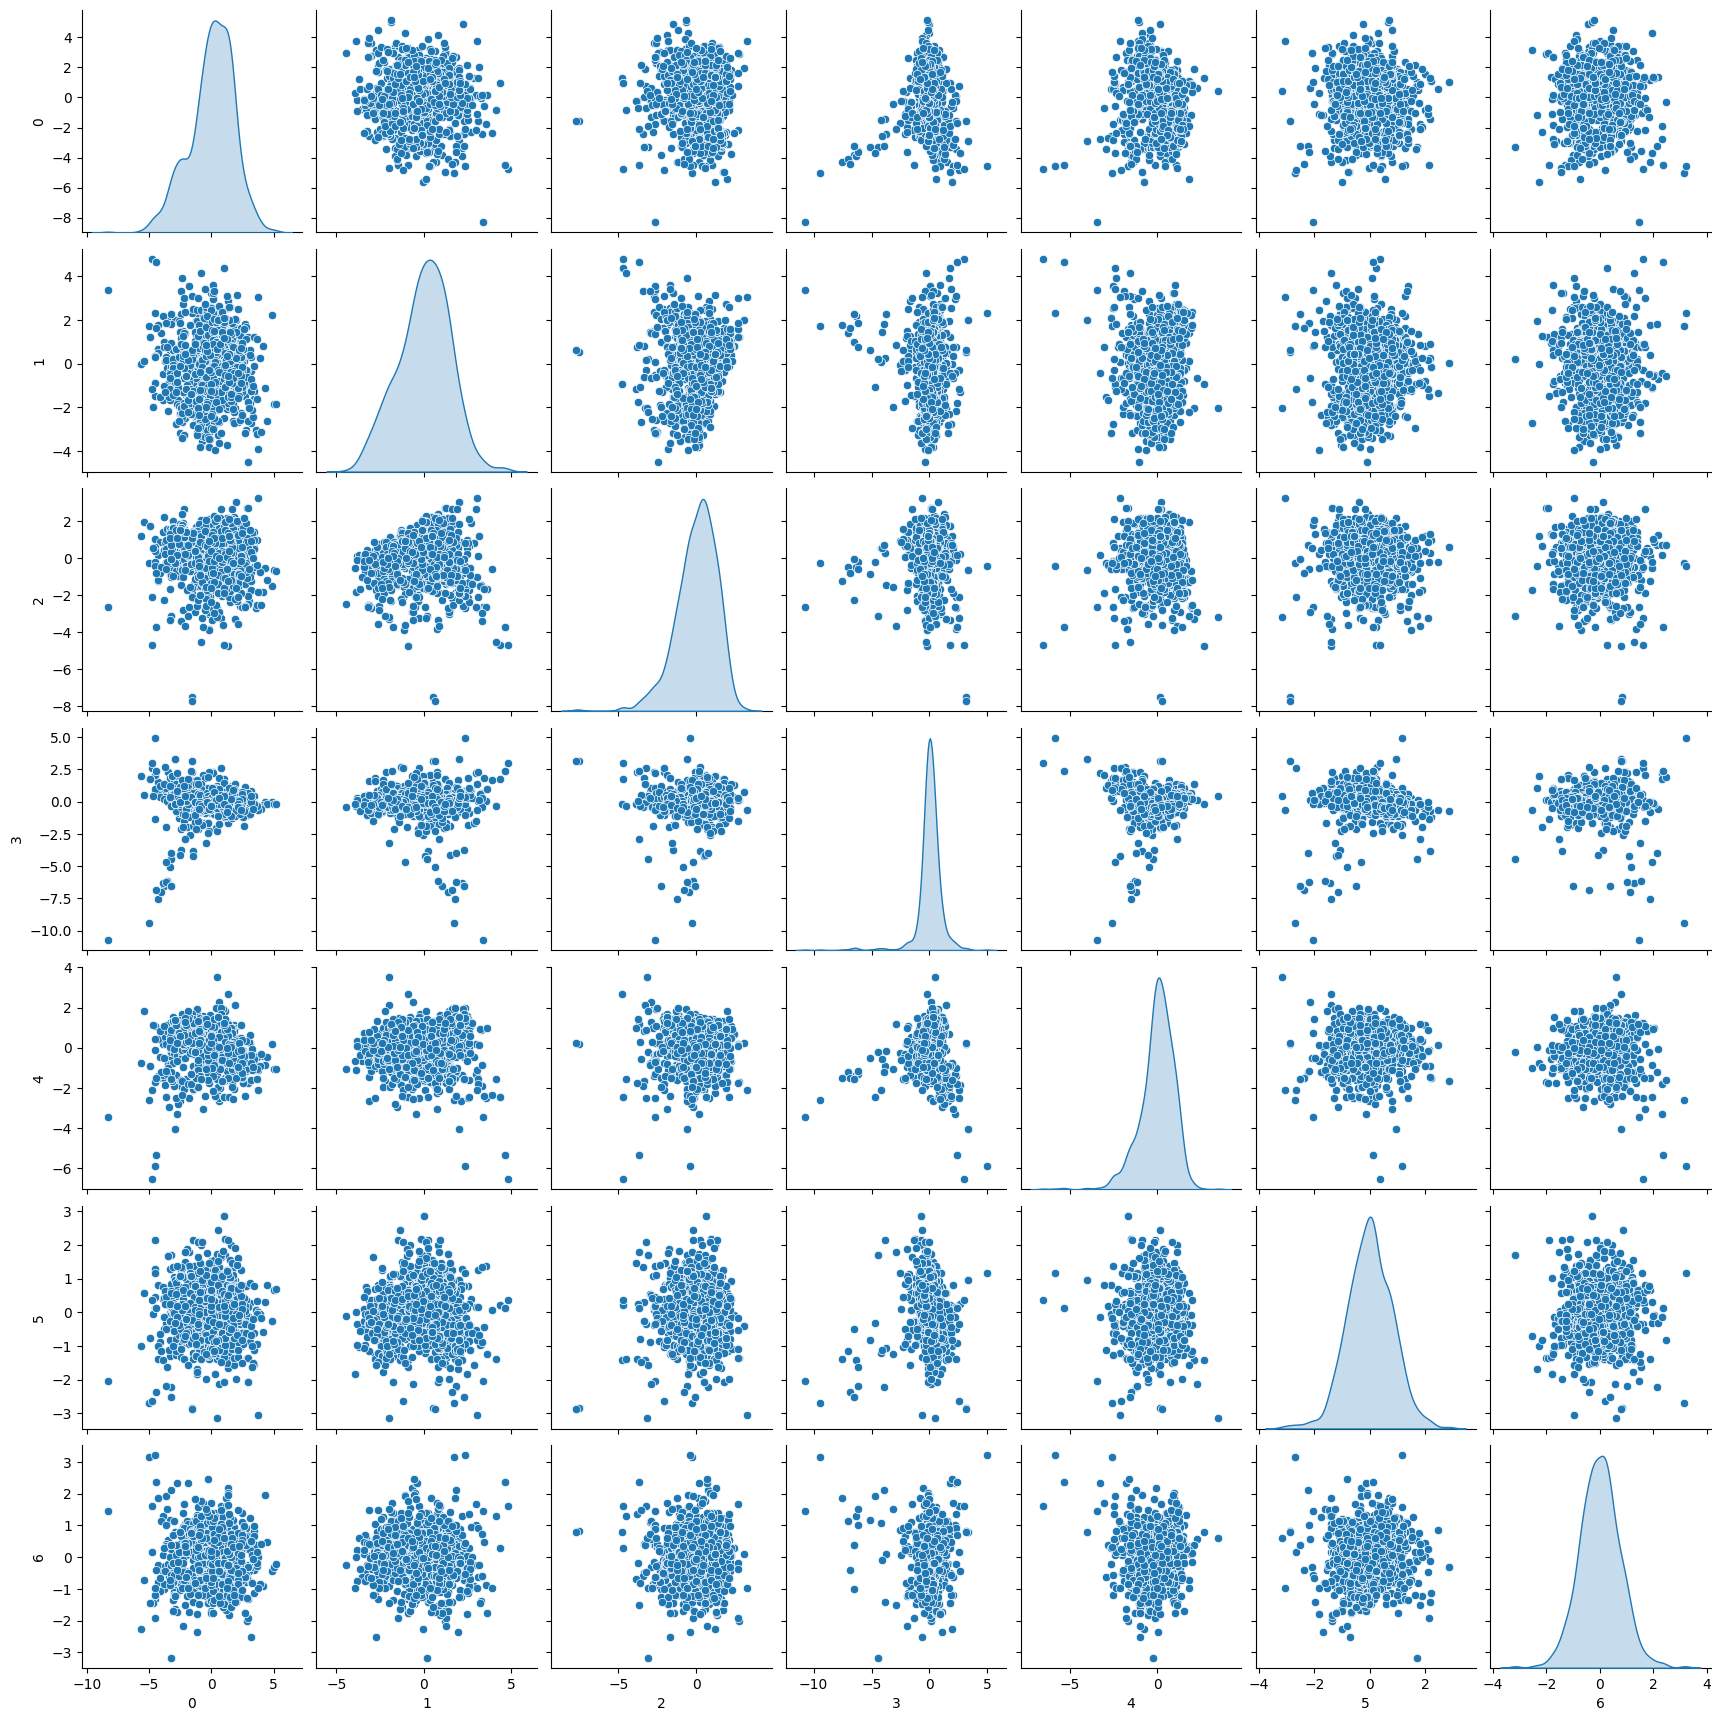

In [27]:
sns.pairplot(reduced_pca, diag_kind='kde')
#sns.pairplot(reduced_pca1, diag_kind='kde')

It is clealry visible from the pairplot above that:

After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no lienaer kind of relationship.

<b>Independent Component Analysis (ICA)</b> is another popular technique in machine learning for dimensionality reduction. Unlike PCA, which focuses on identifying the most important features, ICA aims to find a new set of features that are statistically independent and non-Gaussian.

- This means that each feature captures a unique and non-redundant aspect of the original data, which can be useful for a variety of applications, such as signal processing, blind source separation, and image analysis. 

- In an ICA project, the main objective is to identify the independent components that can accurately represent the original data, and use them to create a new set of features in a lower-dimensional space. 

- This can help to reduce noise and improve the performance of machine learning models, particularly when dealing with complex and highly correlated data. In this project, we will explore the use of ICA on a real-world dataset, and demonstrate how it can be used to improve the performance of a machine learning model.

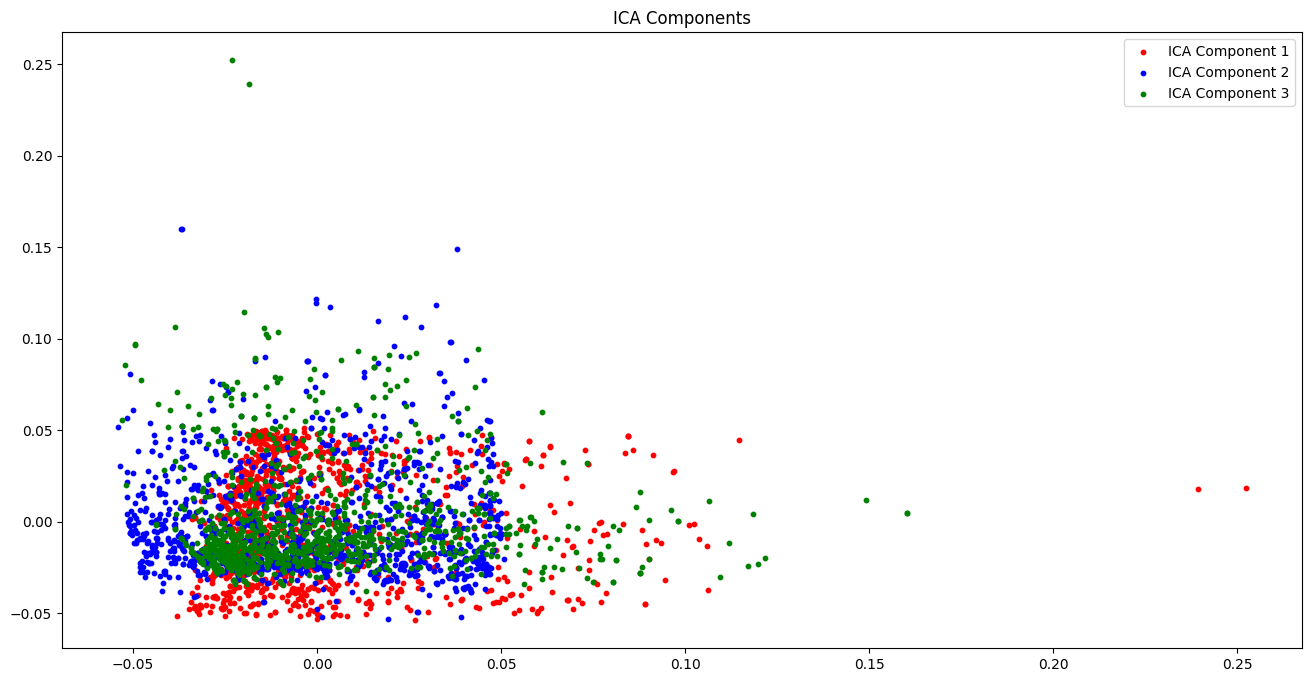

In [28]:
from sklearn.decomposition import FastICA 

data = 'WineQT.xls'
ica_df = pd.read_csv(data)

ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(ica_df.values)

plt.figure(figsize=(16,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1],c='r',s=10)
plt.scatter(X[:,1], X[:,2],c='b',s=10)
plt.scatter(X[:,2], X[:,0],c='g',s=10)
plt.legend(("ICA Component 1","ICA Component 2","ICA Component 3"))

<h5>Observation</h5>

- Based on the results of this Independent Component Analysis, it can be concluded that the variables examined are truly independent of each other rather than simply uncorrelated. This makes ICA a valuable and widely used method for reducing the dimensionality of complex data sets. 

- By identifying the independent factors or groups underlying the data, researchers can gain a deeper understanding of the underlying patterns and relationships within the data. Overall, this analysis highlights the importance of considering both independence and correlation when exploring complex data sets.

<h5>Randomized Projections</h5>

In [29]:
#split the data into 80:20 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.20,random_state=1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.20,random_state=1)

<h5>Feature Selection</h5>

In [30]:
wines = pd.read_csv('winequalityN.csv')

wines['quality_label'] = wines.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')
#wines.quality_label = pd.Categorical(wines.quality_label, categories=['low', 'medium', 'high'], ordered=True)

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=101).reset_index(drop=True)

In [31]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin

wines.dropna(inplace=True)

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """
        Impute missing values:
        - Columns of dtype object are imputed with the most frequent value in column.
        - Columns of other types are imputed with mean of column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

wines = DataFrameImputer().fit_transform(wines)

After the nulls treatments, we will see below the distributions of the data in the qualities by their types, and confirming the imbalance between classes, especially with few cases in high quality.

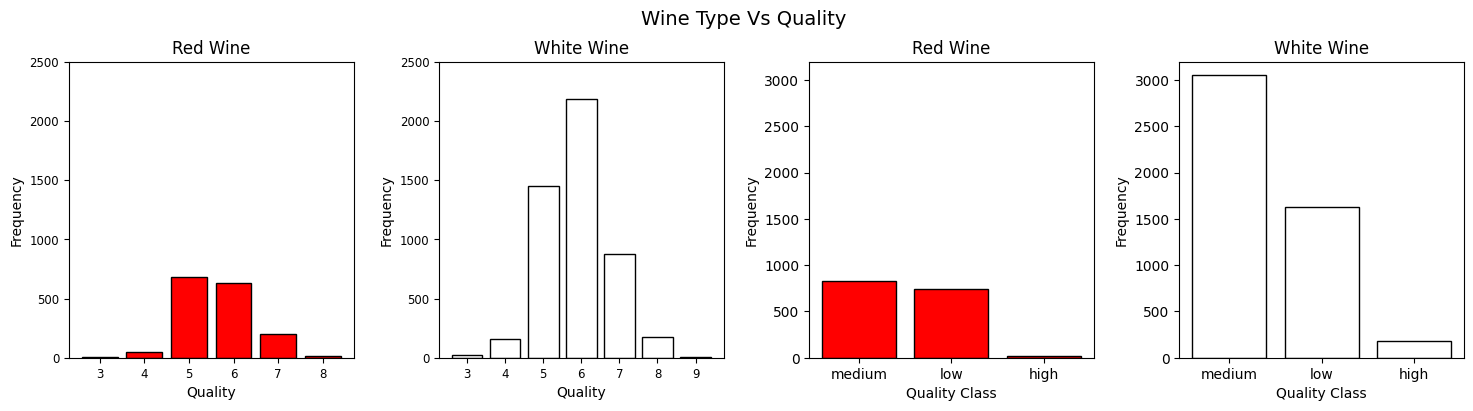

In [33]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type Vs Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = wines.quality[wines.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = wines.quality[wines.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality Class")
ax3.set_ylabel("Frequency") 
rw_q = wines.quality_label[wines.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality Class")
ax4.set_ylabel("Frequency") 
ww_q = wines.quality_label[wines.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', edgecolor='black', linewidth=1, tick_label =ww_q[0])

<h5>Descriptive Statistics</h5>

In [34]:
#By type

subset_attributes = wines.columns
rs = round(wines.loc[wines.type == 'red', subset_attributes].describe(),2)
ws = round(wines.loc[wines.type == 'white', subset_attributes].describe(),2)
pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1593.0   8.33   1.74  4.60   7.10   7.90   
volatile acidity                  1593.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1593.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1593.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1593.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1593.0  15.84  10.44  1.00   7.00  14.00   
total sulfur dioxide              1593.0  46.46  32.91  6.00  22.00  38.00   
density                           1593.0   1.00   0.00  0.99   1.00   1.00   
pH                                1593.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1593.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1593.0  10.42   1.07  8.40   9.50  10.20   
quality                           1593.0   5.64   0.81  3.00   5.00   6.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4870.0    6.86   0.84   
volatile acidity       0.64    1.58                4870.0    0.28   0.10   
citric acid            0.42    1.00                4870.0    0.33   0.12   
residual sugar         2.60   15.50                4870.0    6.39   5.07   
chlorides              0.09    0.61                4870.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4870.0   35.32  17.01   
total sulfur dioxide  62.00  289.00                4870.0  138.34  42.49   
density                1.00    1.00                4870.0    0.99   0.00   
pH                     3.40    4.01                4870.0    3.19   0.15   
sulphates              0.73    2.00                4870.0    0.49   0.11   
alcohol               11.10   14.90                4870.0   10.52   1.23   
quality                6.00    8.00                4870.0    5.88   0.89   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00

In [35]:
#by quality

subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=0, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine']).T

Low Quality Wine                                              \
                            count  mean   std   min   25%   50%    75%    max   
alcohol                    2372.0  9.87  0.84  8.00  9.30  9.60  10.40  14.90   
volatile acidity           2372.0  0.40  0.19  0.10  0.26  0.34   0.50   1.58   
pH                         2372.0  3.21  0.16  2.74  3.11  3.20   3.31   3.90   
quality                    2372.0  4.88  0.36  3.00  5.00  5.00   5.00   5.00   

                 Medium Quality Wine         ...                \
                               count   mean  ...    75%    max   
alcohol                       3894.0  10.81  ...  11.70  14.20   
volatile acidity              3894.0   0.31  ...   0.36   1.04   
pH                            3894.0   3.22  ...   3.32   4.01   
quality                       3894.0   6.28  ...   7.00   7.00   

                 High Quality Wine                                          \
                             count   mean   std   min    25%    50%    75%   
alcohol                      197.0  11.69  1.27  8.50  11.00  12.00  12.60   
volatile acidity             197.0   0.29  0.12  0.12   0.21   0.27   0.35   
pH                           197.0   3.22  0.16  2.88   3.13   3.23   3.33   
quality                      197.0   8.03  0.16  8.00   8.00   8.00   8.00   

                         
                    max  
alcohol           14.00  
volatile acidity   0.85  
pH                 3.72  
quality            9.00  

[4 rows x 24 columns]

Check for any correlations between features

In [36]:
# re-shuffle records just to randomize data points
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler

wines = wines.sample(frac=1, random_state=101).reset_index(drop=True)

class_tp = LabelEncoder()
y_tp = class_tp.fit_transform(wines.type.values) # 1 - White; 0 - Red
wines['color'] = y_tp

class_ql = {'low':0, 'medium': 1, 'high': 2}
y_ql = wines.quality_label.map(class_ql)

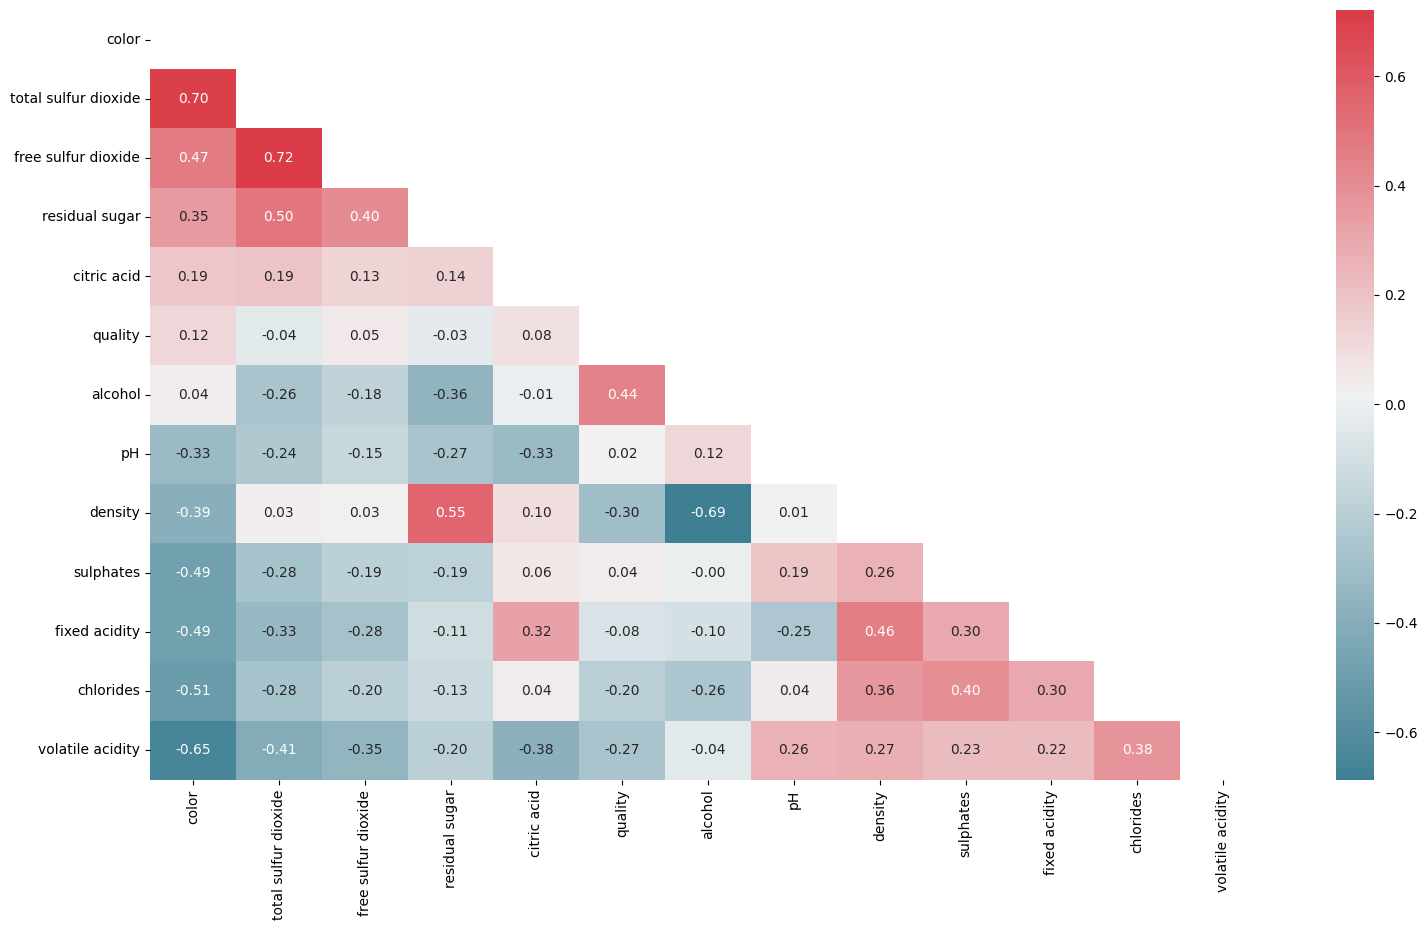

In [37]:
corr = wines.corr()
top_corr_cols = corr.color.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.show()
del corr, dropSelf, top_corr

While most of the correlations are weak, we can see that:

- Total and free sulfur dioxide has the higest correlation with white wines and each other. In fact, the second is a parcel of the fisrt and it is represent a colinearity that can be a problamem for linear classifiers, special if the target will predict the color, in that case we need drop the free sulfur dioxide.

- The residual sugar has a half relation to the total sulfur dioxide and 0.40 with free, it is a god indication that wich more residual sugar more sulfur dioxide is added by the winemaker. 

- The 0.5 indicates that white wine tend to have more residual sugar then red wine.

- Density has a relatively high positive correlation to residual sugar and relatively high negative correlation to alcohol.

- The chlorides and volatile acidity has -0.51 and -0,65 correlations between color, indicate a tendency to red wines classification.

<b>Check for any correlations between features</b>

In [38]:
# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=101).reset_index(drop=True)

class_tp = LabelEncoder()
y_tp = class_tp.fit_transform(wines.type.values) # 1 - White; 0 - Red
wines['color'] = y_tp

class_ql = {'low':0, 'medium': 1, 'high': 2}
y_ql = wines.quality_label.map(class_ql)

Check for correlations based on wines types

Now, I will make a zoom in these features in order of their correlation with type of wine:

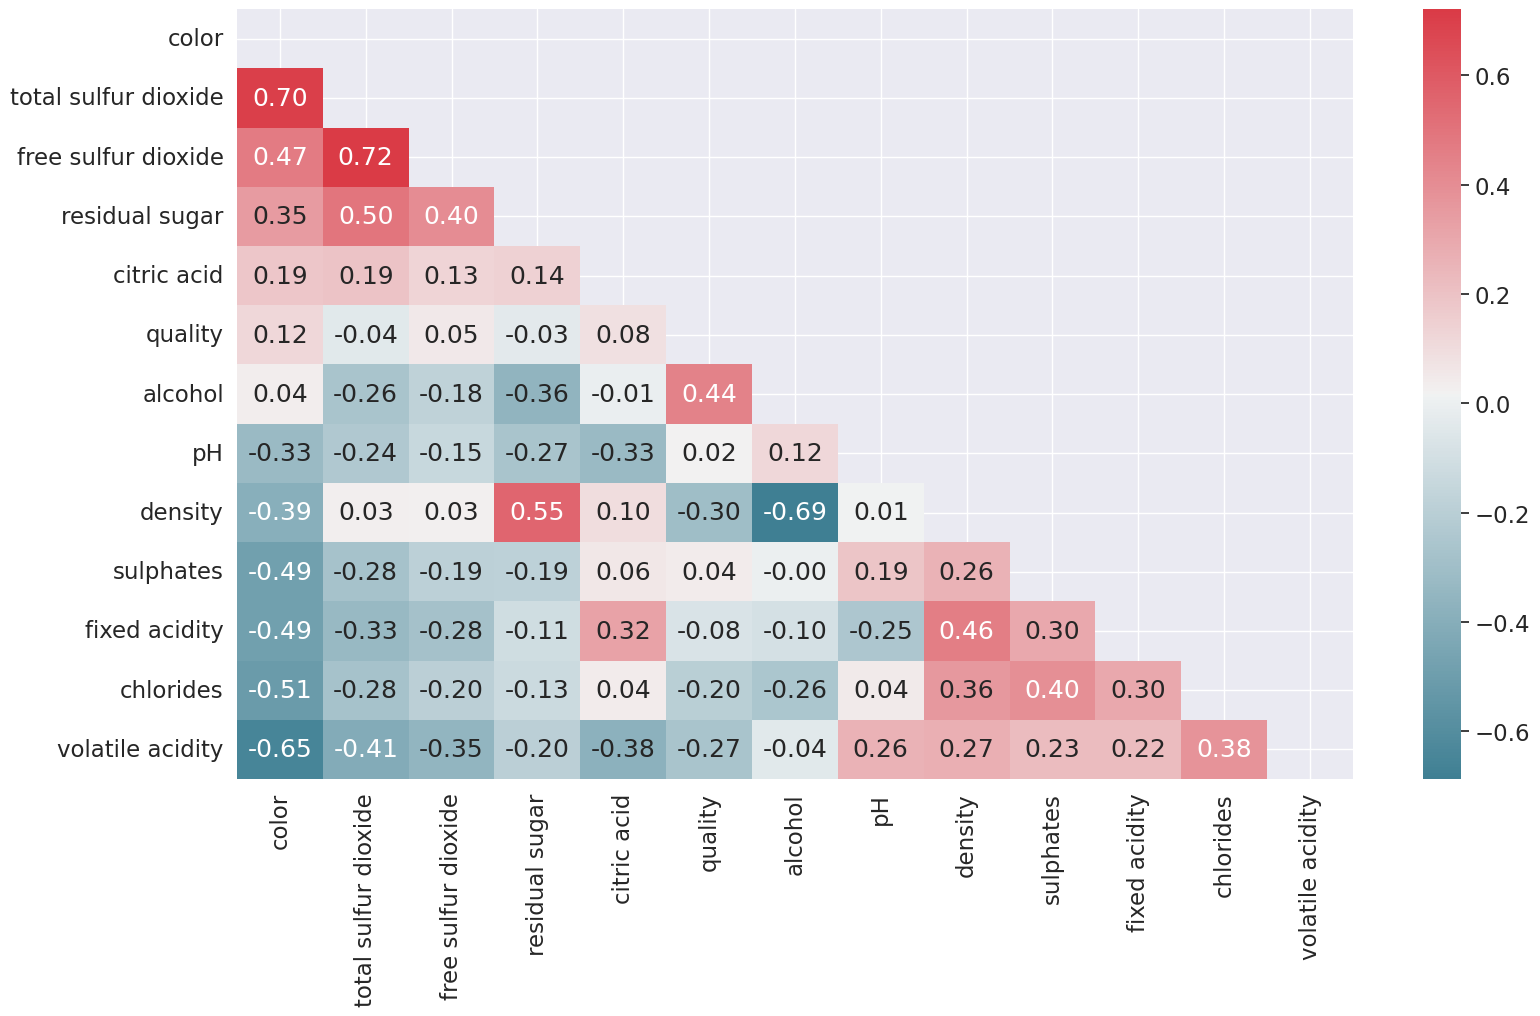

In [39]:
corr = wines.corr()
top_corr_cols = corr.color.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.show()
del corr, dropSelf, top_corr

While most of the correlations are weak, we can see that:

- Total and free sulfur dioxide has the higest correlation with white wines and each other. 

- In fact, the second is a parcel of the fisrt and it is represent a colinearity that can be a problamem for linear classifiers, special if the target will predict the color, in that case we need drop the free sulfur dioxide.

- The residual sugar has a half relation to the total sulfur dioxide and 0.40 with free, it is a god indication that wich more residual sugar more sulfur dioxide is added by the winemaker. 

- The 0.5 indicates that white wine tend to have more residual sugar then red wine.

- Density has a relatively high positive correlation to residual sugar and relatively high negative correlation to alcohol.

- The chlorides and volatile acidity has -0.51 and -0,65 correlations between color, indicate a tendency to red wines classification.

In [40]:
reduced_pca.head()

,0,1,2,3,4,5,6
0,1.720446,1.254021,1.334779,-0.007238,-0.253902,0.933610,-0.178208
1,0.961641,2.119712,-0.173127,-0.410557,-0.254302,-0.774594,-1.257337
2,0.873670,1.469283,0.594143,-0.338187,-0.134906,-0.310462,-0.660257
3,-2.351491,-0.206620,-0.099049,0.774453,1.668717,0.159977,0.198380
4,1.720446,1.254021,1.334779,-0.007238,-0.253902,0.933610,-0.178208


<h1>Question 3<h1>

In [41]:
# Standardize data
scaler = StandardScaler() 
scaled_df_1 = scaler.fit_transform(reduced_pca) 
  
# Normalizing the Data 
normalized_df1 = normalize(scaled_df_1) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df1 = pd.DataFrame(normalized_df1) 
  
# Reducing the dimensions of the data 
pca1 = PCA(n_components = 2) 
X_principal1 = pca1.fit_transform(normalized_df1) 
X_principal1 = pd.DataFrame(X_principal1) 
X_principal1.columns = ['P1', 'P2'] 
  
X_principal1.head(2)

,P1,P2
0,-0.594615,0.382955
1,-0.445037,0.533287


In [42]:
gmm1 = GaussianMixture(n_components = 3) 
gmm1.fit(X_principal)

GaussianMixture(n_components=3)

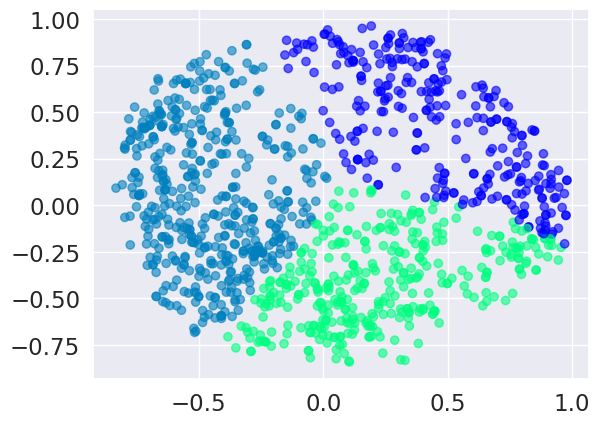

In [43]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 
plt.show()

<h1>Question 4</h1>

In [44]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(dimensionaly_reduced_data) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
#X_principal.head(2)


gmm = GaussianMixture(n_components = 3) 
gmm.fit(X_principal)

GaussianMixture(n_components=3)

<h1>Question 5</h1>

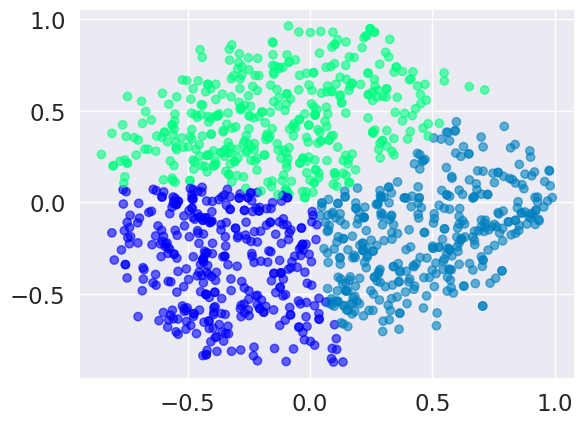

In [45]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(dimensionaly_reduced_data) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
#X_principal.head(2)


gmm = GaussianMixture(n_components = 3) 
gmm.fit(X_principal)


def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]


n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        labels=gmm.predict(X_principal)
        sil=metrics.silhouette_score(X_principal, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 